## ARBOL DE DECISION TITANIC

# Danna Geraldine Garcia Tique 

In [3]:
#Importar las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
import os 
print (os.getcwd())

C:\Users\oscar\Downloads\ARBOL DECISION TITANIC 1.1


In [7]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
Titanic = pd.read_csv('Titanic-Dataset.csv')

In [34]:
#Informacion general
print (Titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [32]:
data.shape

(891, 12)

In [36]:
#variable numerica
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
#Distribucion variable
print (Titanic['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [44]:
#Proporcion
print (Titanic['Survived'].value_counts(normalize = True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [46]:
#Distribucion de las variables
print (Titanic['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [48]:
print (Titanic['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [50]:
print (Titanic['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


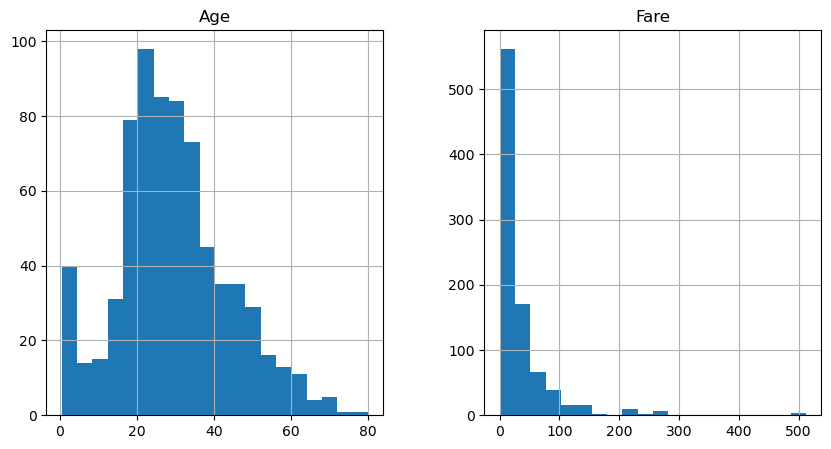

In [52]:
num_cols = ['Age', 'Fare']
Titanic[num_cols].hist(bins=20, figsize =(10, 5))
plt.show()

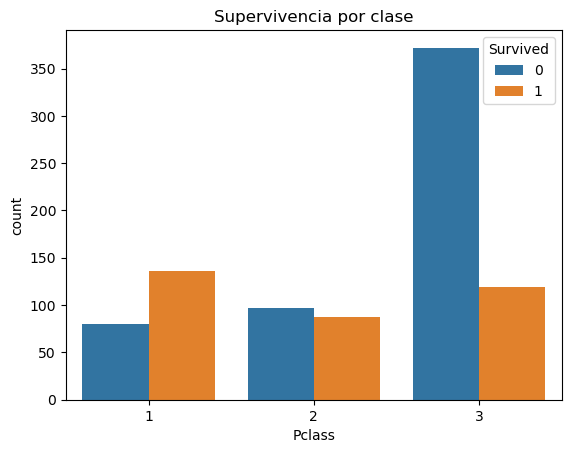

In [54]:
#Relacion entre clases 
sns.countplot(data = Titanic, x = 'Pclass', hue = 'Survived')
plt.title("Supervivencia por clase")
plt.show()

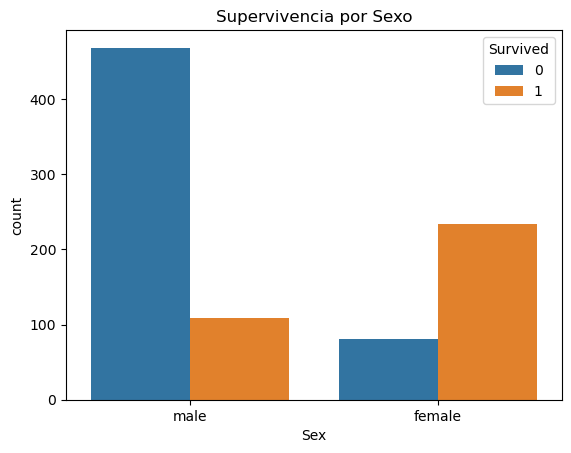

In [56]:
sns.countplot(data = Titanic, x='Sex', hue='Survived')
plt.title("Supervivencia por Sexo")
plt.show()

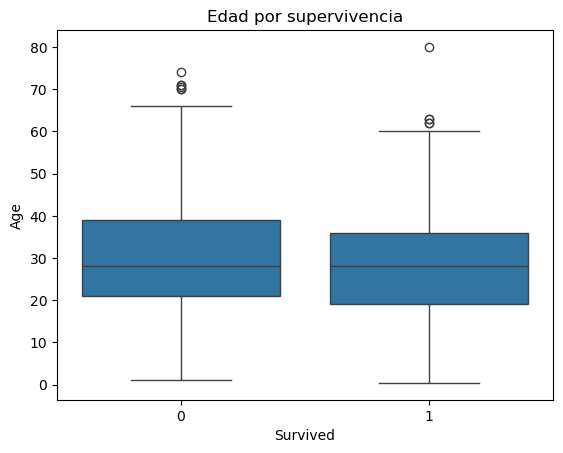

In [58]:
#Relacion numerica
sns.boxplot(data=Titanic, x='Survived', y='Age')
plt.title("Edad por supervivencia")
plt.show()

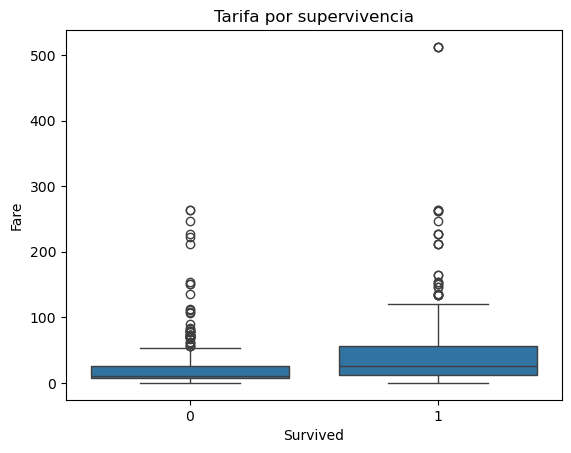

In [60]:
sns.boxplot(data = Titanic, x='Survived', y='Fare')
plt.title ("Tarifa por supervivencia")
plt.show()

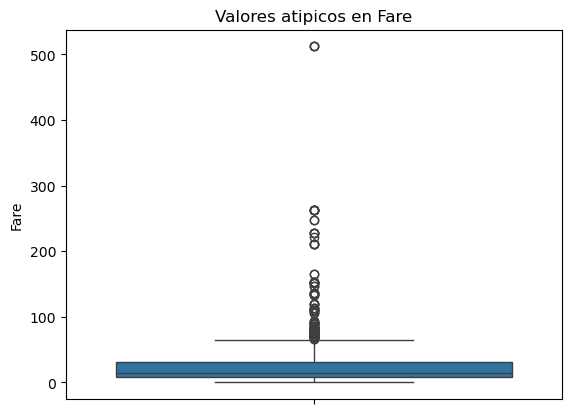

In [62]:
#Valores atipicos
sns.boxplot(data=Titanic, y='Fare')
plt.title ("Valores atipicos en Fare")
plt.show()

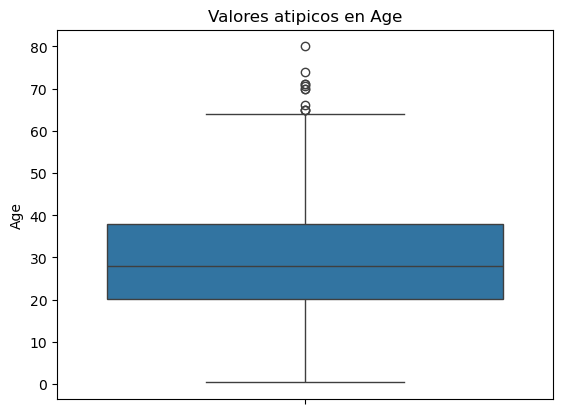

In [64]:
sns.boxplot(data=Titanic, y='Age')
plt.title("Valores atipicos en Age")
plt.show()

In [66]:
numeric_data = Titanic.select_dtypes(include = ['float64', 'int64'])
print (numeric_data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [68]:
corr_matrix = numeric_data.corr()
print (corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


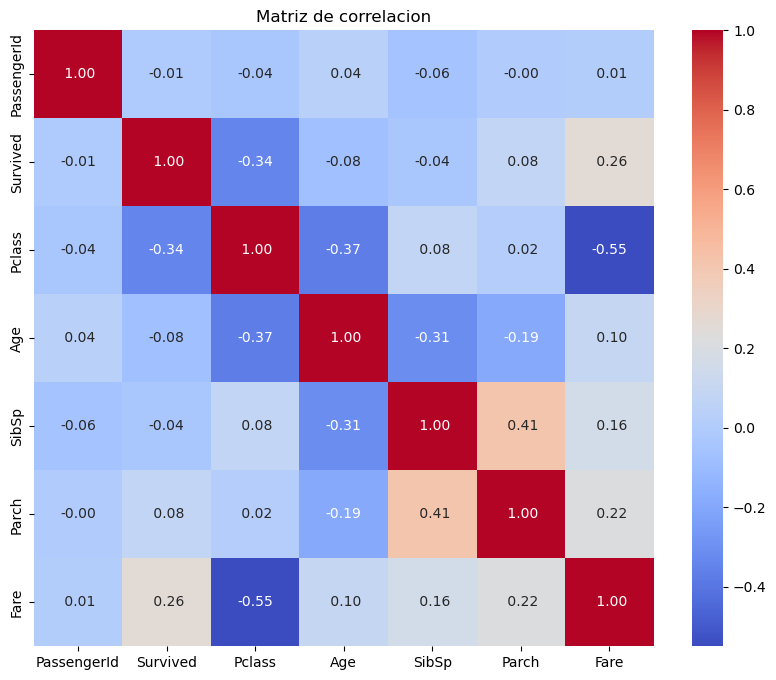

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=' .2f')
plt.title("Matriz de correlacion")
plt.show()

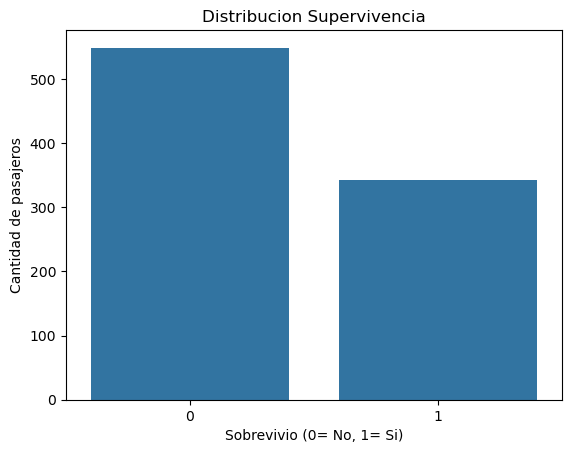

In [97]:
#Tendencia supervivencia general
sns.countplot(data=Titanic, x='Survived')
plt.title("Distribucion Supervivencia")
plt.xlabel("Sobrevivio (0= No, 1= Si)")
plt.ylabel("Cantidad de pasajeros")
plt.show()

In [82]:
#porcentaje de sobreviviencia
survival_rate = Titanic['Survived'].value_counts(normalize = True)*100
print (survival_rate)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


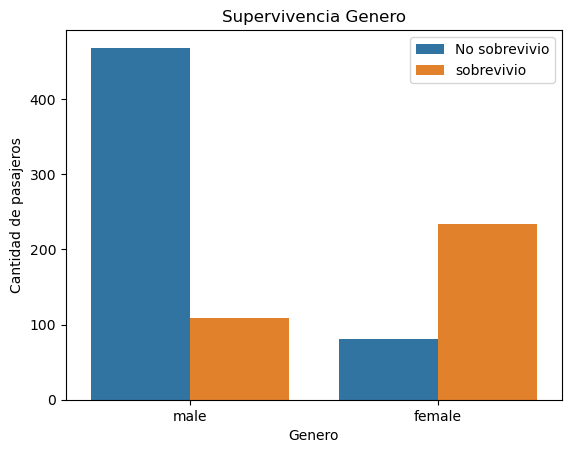

In [89]:
#Tendencia por sexo
sns.countplot(data=Titanic, x='Sex', hue='Survived')
plt.title("Supervivencia Genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["No sobrevivio", "sobrevivio"])
plt.show()

In [95]:
print (Titanic.groupby('Sex') ['Survived'].mean()*100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


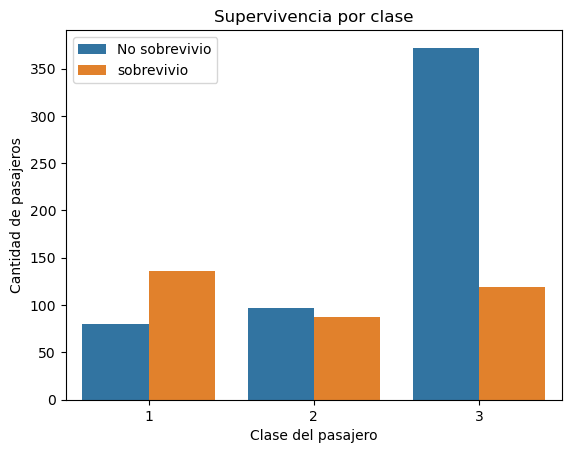

In [99]:
#Tendencia por clase
sns.countplot(data=Titanic, x='Pclass', hue='Survived')
plt.title("Supervivencia por clase")
plt.xlabel("Clase del pasajero")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["No sobrevivio", "sobrevivio"])
plt.show()

In [134]:
#Promedio por clase
print (Titanic.groupby('Pclass') ['Survived'].mean()*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


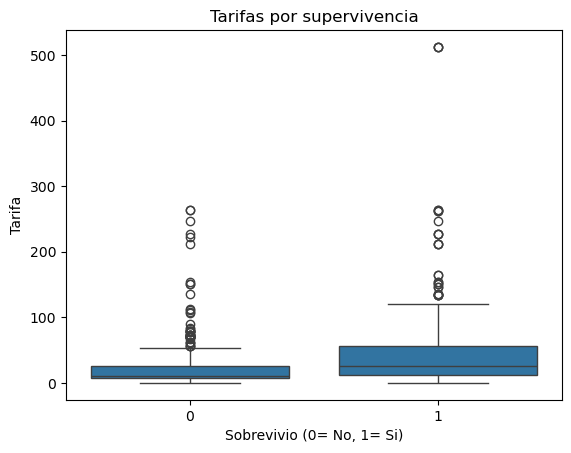

In [130]:
#Tendencia por tarifa 
sns.boxplot(data=Titanic, x='Survived', y='Fare')
plt.title("Tarifas por supervivencia")
plt.xlabel("Sobrevivio (0= No, 1= Si)")
plt.ylabel("Tarifa")
plt.show()

In [136]:
#Promedio por tarifa
print (Titanic.groupby('Survived')['Fare'].mean())

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


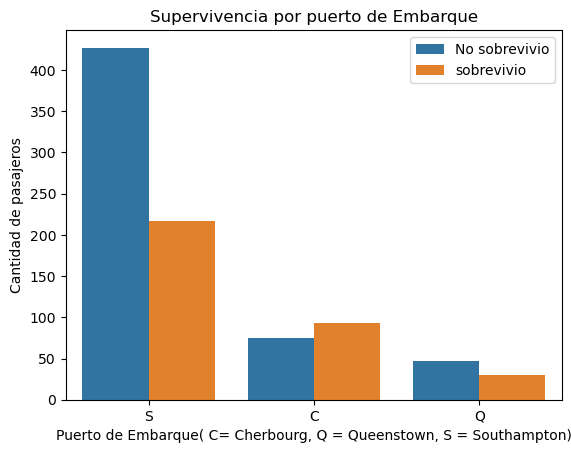

In [146]:
#Tendencia de embarque
sns.countplot(data=Titanic, x='Embarked', hue='Survived')
plt.title("Supervivencia por puerto de Embarque")
plt.xlabel("Puerto de Embarque( C= Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["No sobrevivio", "sobrevivio"])
plt.show()

In [150]:
#Porcentaje por embarque
print(Titanic.groupby('Embarked')['Survived'].mean()*100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [152]:
#valores nulos
print (Titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64


In [154]:
#Porcentaje valores nulos
print (Titanic.isnull().mean()*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
AgeGroup       19.865320
dtype: float64


In [168]:
#Valores faltantes de Age
Titanic['Age']=Titanic['Age'].fillna(Titanic['Age'].median())

In [178]:
#Valores faltantes Embarked
Titanic['Embarked']=Titanic['Embarked'].fillna(Titanic['Embarked'].mode())

In [180]:
#Columna de cabina asignada
Titanic['HasCabin']=Titanic['Cabin'].notnull().astype(int)

In [11]:
import pandas as pd
Titanic = pd.read_csv('Titanic-Dataset.csv')

In [13]:
#Eliminar columna Cabin
Titanic.drop(columns=['Cabin'], inplace=True)

In [15]:
#Valores nulos en Fare
Titanic['Fare'].fillna(Titanic['Fare'].median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [17]:
from sklearn.preprocessing import LabelEncoder
Titanic['Sex']= LabelEncoder().fit_transform(Titanic['Sex'])

In [19]:
#Convertir variable dummy
Titanic = pd.get_dummies(Titanic, columns=['Embarked'], drop_first=True)

In [21]:
#Eliminar columnas
Titanic.drop(columns=['PassengerId', 'Name', 'Ticket'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,True
887,1,1,0,19.0,0,0,30.0000,False,True
888,0,3,0,NaN,1,2,23.4500,False,True
889,1,1,1,26.0,0,0,30.0000,False,False


In [23]:
print(Titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

In [25]:
print(Titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [31]:
X = Titanic.drop(columns=['Survived']) 
y = Titanic['Survived']

In [39]:
X = X.drop(columns = ['Name','Ticket'], errors='ignore')

In [41]:
print (X.dtypes)

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [43]:
if 'Embarked' in X.columns: X = pd.get_dummies(X, columns= ['Embarked'], drop_first= True)

In [45]:
if 'Sex' in X.columns: X ['Sex'] = LabelEncoder().fit_transform(X['Sex'])

In [47]:
X = X.fillna(X.median())

In [49]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance':model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

       Feature  Importance
2          Sex    0.265979
0  PassengerId    0.188394
6         Fare    0.188029
3          Age    0.175337
1       Pclass    0.080597
4        SibSp    0.042625
5        Parch    0.028778
8   Embarked_S    0.021079
7   Embarked_Q    0.009182


In [53]:
#Caracteristicas importantes
important_features = feature_importances[feature_importances['Importance'] > 0.05]['Feature']
X_selected = X[important_features]
print(X_selected.head())

   Sex  PassengerId     Fare   Age  Pclass
0    1            1   7.2500  22.0       3
1    0            2  71.2833  38.0       1
2    0            3   7.9250  26.0       3
3    0            4  53.1000  35.0       1
4    1            5   8.0500  35.0       3


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)
train_accuracy = dt_model.score(X_train, y_train)
test_accuracy= dt_model.score(X_test, y_test)
print (f"Entrenamiento: {train_accuracy}")
print (f"Prueba: {test_accuracy}")

Entrenamiento: 0.8370786516853933
Prueba: 0.7988826815642458


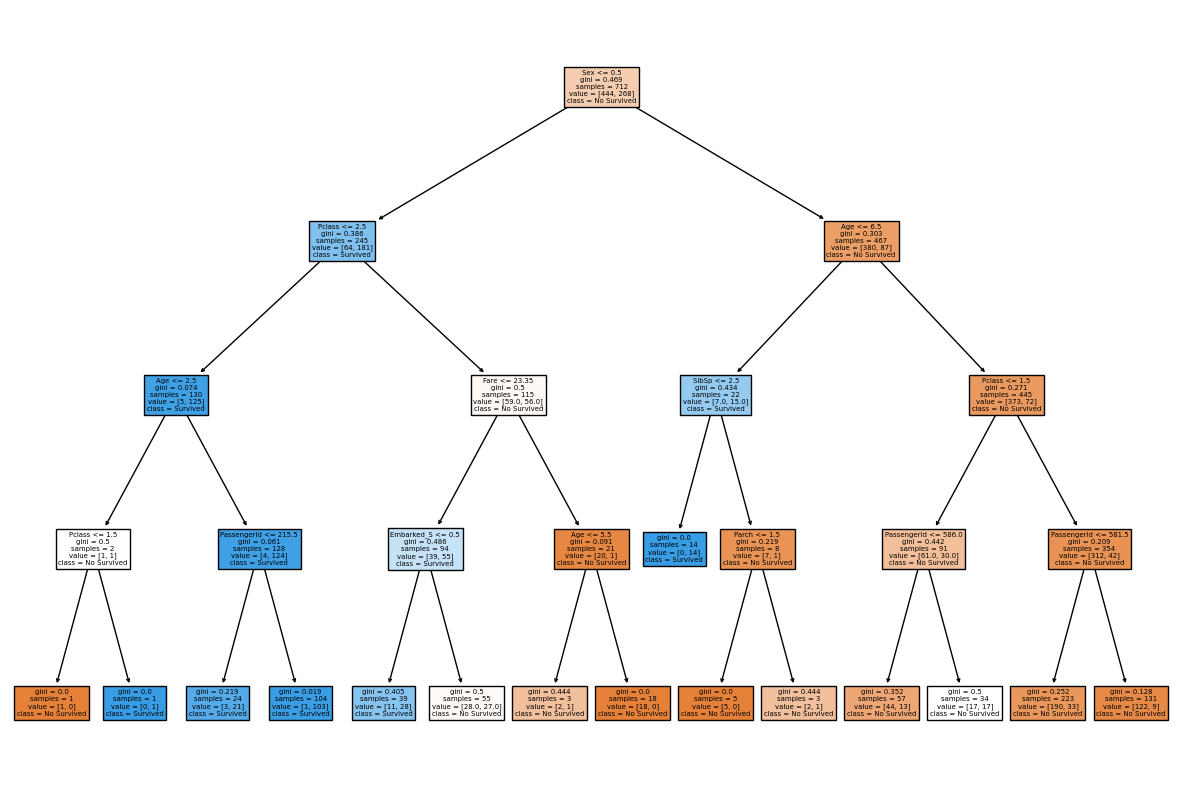

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
tree.plot_tree(dt_model, feature_names = X.columns, class_names= ['No Survived', 'Survived'], filled=True)
plt.show()

In [77]:
#Evaluar modelo
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt_model.predict(X_test)
print ("Matriz confusion:")
print (confusion_matrix(y_test, y_pred))

Matriz confusion:
[[96  9]
 [27 47]]


In [69]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros a evaluar
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda en cuadrícula
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar mejor modelo
best_test_accuracy = best_model.score(X_test, y_test)
print(f"Precisión con el mejor modelo: {best_test_accuracy}")

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión con el mejor modelo: 0.7988826815642458


In [71]:
y_pred = dt_model.predict(X_test)

In [79]:
#Metricas
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names= ['No Survived', 'Survived'])
print ("Reporte clasificacion")
print (report)

Reporte clasificacion
              precision    recall  f1-score   support

 No Survived       0.78      0.91      0.84       105
    Survived       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



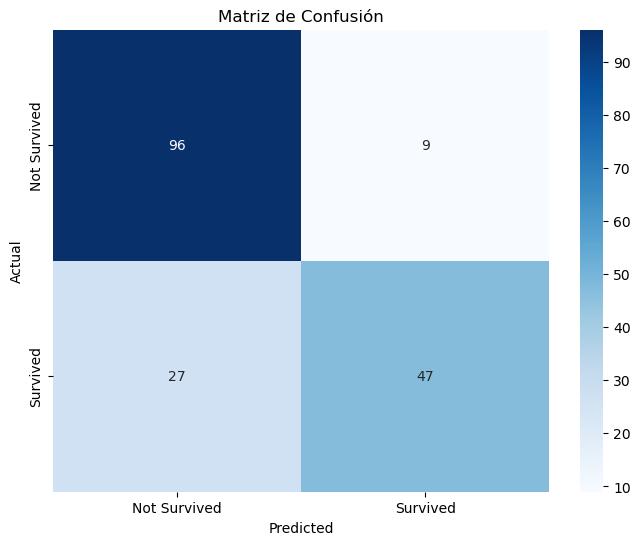

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

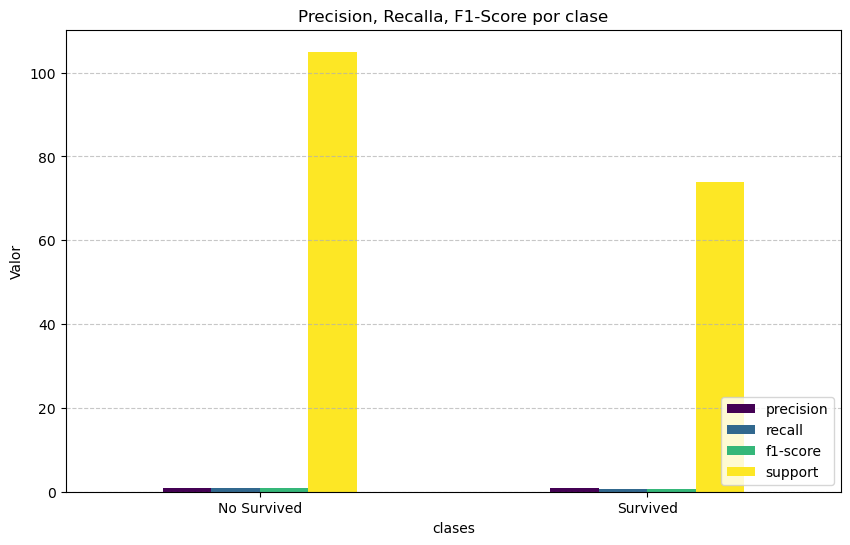

In [99]:
#Grafico de barras 
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
report_dict = classification_report(y_test, y_pred, target_names=['No Survived', 'Survived'], output_dict = True)
metrics_df = pd.DataFrame(report_dict).T.iloc[:-3,:]
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Precision, Recalla, F1-Score por clase')
plt.ylabel('Valor')
plt.xlabel('clases')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

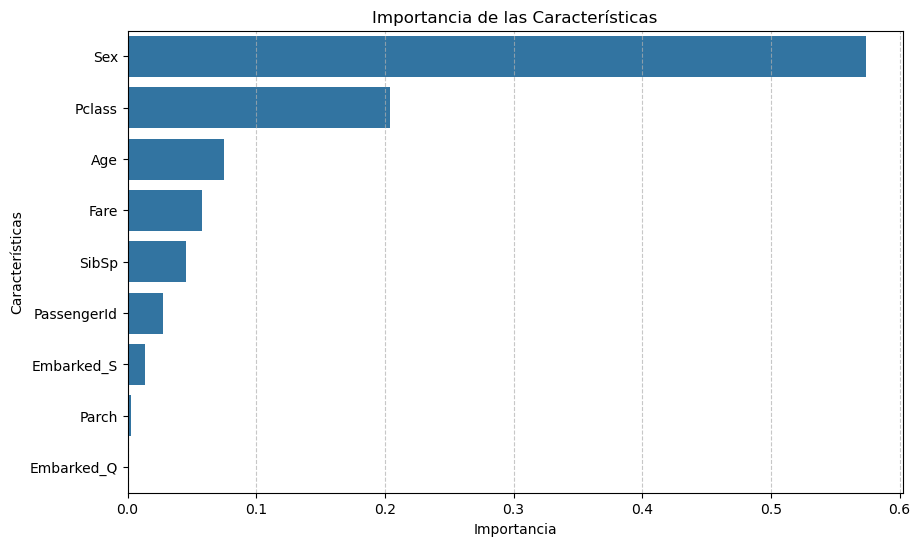

In [97]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

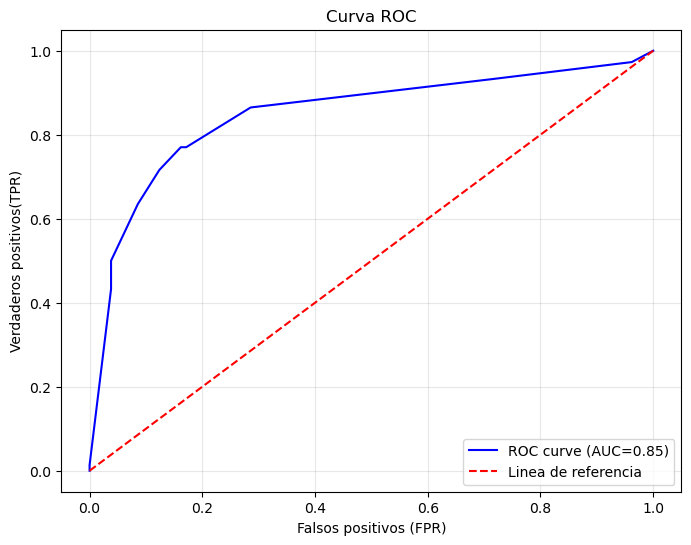

In [103]:
#curva ROC
from sklearn.metrics import roc_curve, auc
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'blue', label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linea de referencia')
plt.xlabel('Falsos positivos (FPR)')
plt.ylabel('Verdaderos positivos(TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()